In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [144]:
adult = pd.read_csv('/content/adult_with_headers.csv')
adult.sample()

age   workclass  fnlwgt education  ...  capital_loss hours_per_week  native_country  income
12054   53   Local-gov  176557   Masters  ...             0             50   United-States   <=50K

[1 rows x 15 columns]

In [145]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [146]:
adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [147]:
adult.duplicated().sum()

24

In [148]:
adult[adult.duplicated()]

age          workclass  fnlwgt  ... hours_per_week  native_country  income
4881    25            Private  308144  ...             40          Mexico   <=50K
5104    90            Private   52386  ...             35   United-States   <=50K
9171    21            Private  250051  ...             10   United-States   <=50K
11631   20            Private  107658  ...             10   United-States   <=50K
13084   25            Private  195994  ...             40       Guatemala   <=50K
15059   21            Private  243368  ...             50          Mexico   <=50K
17040   46            Private  173243  ...             40   United-States   <=50K
18555   30            Private  144593  ...             40               ?   <=50K
18698   19            Private   97261  ...             40   United-States   <=50K
21318   19            Private  138153  ...             10   United-States   <=50K
21490   19            Private  146679  ...             30   United-States   <=50K
21875   49            Private   31267  ...             40   United-States   <=50K
22300   25            Private  195994  ...             40       Guatemala   <=50K
22367   44            Private  367749  ...             45          Mexico   <=50K
22494   49   Self-emp-not-inc   43479  ...             40   United-States   <=50K
25872   23            Private  240137  ...             55          Mexico   <=50K
26313   28            Private  274679  ...             50   United-States   <=50K
28230   27            Private  255582  ...             40   United-States   <=50K
28522   42            Private  204235  ...             40   United-States    >50K
28846   39            Private   30916  ...             40   United-States   <=50K
29157   38            Private  207202  ...             48   United-States    >50K
30845   46            Private  133616  ...             40   United-States   <=50K
31993   19            Private  251579  ...             14   United-States   <=50K
32404   35            Private  379959  ...             40   United-States   <=50K

[24 rows x 15 columns]

In [149]:
adult = adult.drop_duplicates()
adult.head()

age          workclass  fnlwgt   education  ...  capital_loss hours_per_week  native_country  income
0   39          State-gov   77516   Bachelors  ...             0             40   United-States   <=50K
1   50   Self-emp-not-inc   83311   Bachelors  ...             0             13   United-States   <=50K
2   38            Private  215646     HS-grad  ...             0             40   United-States   <=50K
3   53            Private  234721        11th  ...             0             40   United-States   <=50K
4   28            Private  338409   Bachelors  ...             0             40            Cuba   <=50K

[5 rows x 15 columns]

In [150]:
adult.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
count  32537.000000  3.253700e+04   32537.000000  32537.000000  32537.000000    32537.000000
mean      38.585549  1.897808e+05      10.081815   1078.443741     87.368227       40.440329
std       13.637984  1.055565e+05       2.571633   7387.957424    403.101833       12.346889
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000        1.000000
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000       40.000000
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000       40.000000
75%       48.000000  2.369930e+05      12.000000      0.000000      0.000000       45.000000
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000       99.000000

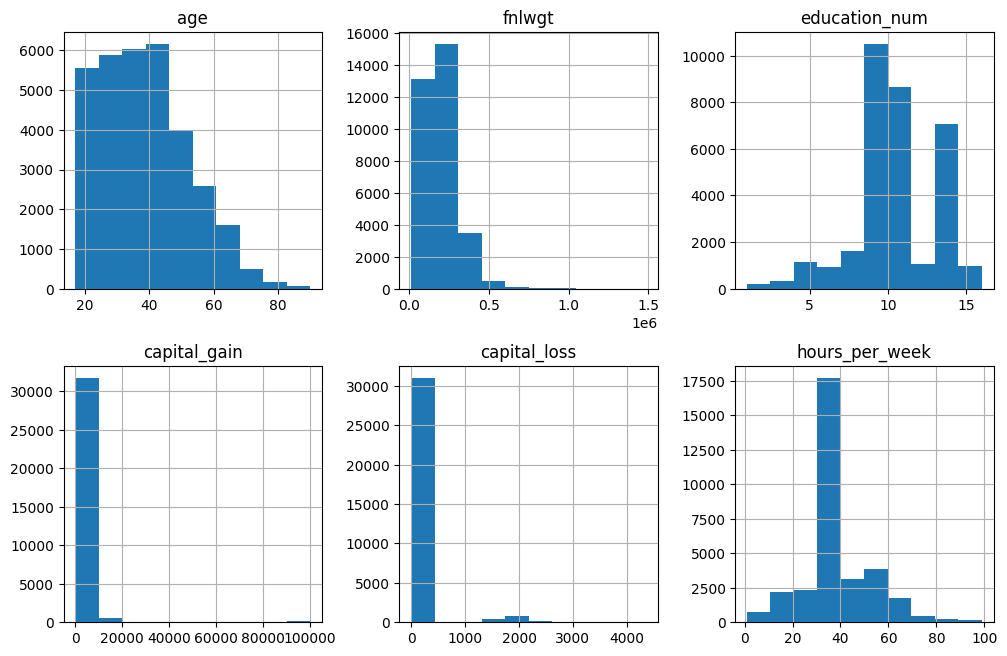

In [151]:
adult[adult.describe().columns].hist(figsize=(12,12), layout=(3,3), sharex=False);
plt.show()

In [152]:
#!pip install klib

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


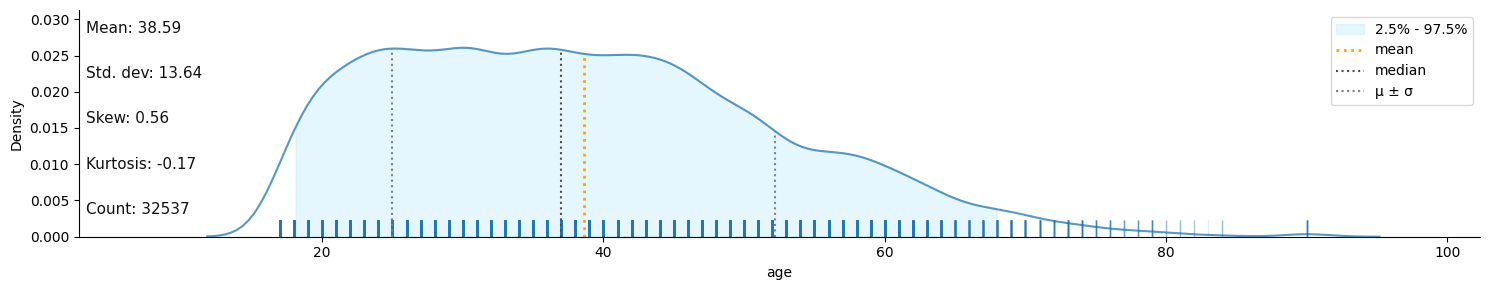

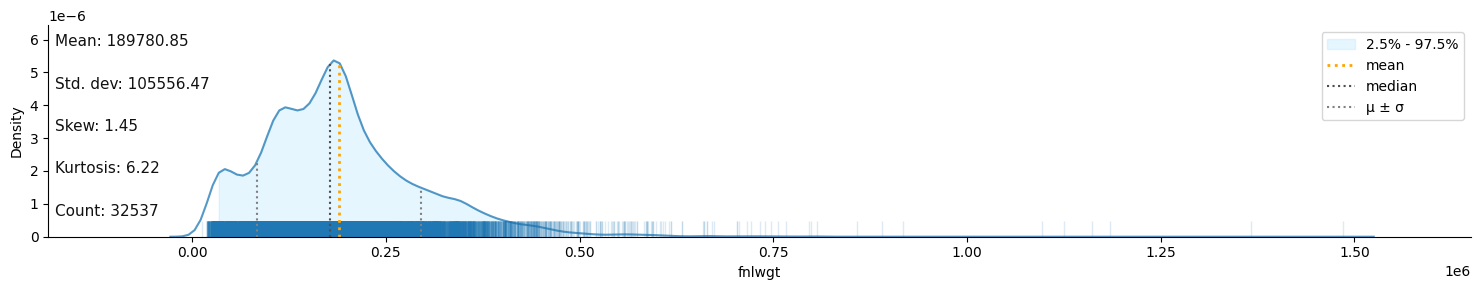

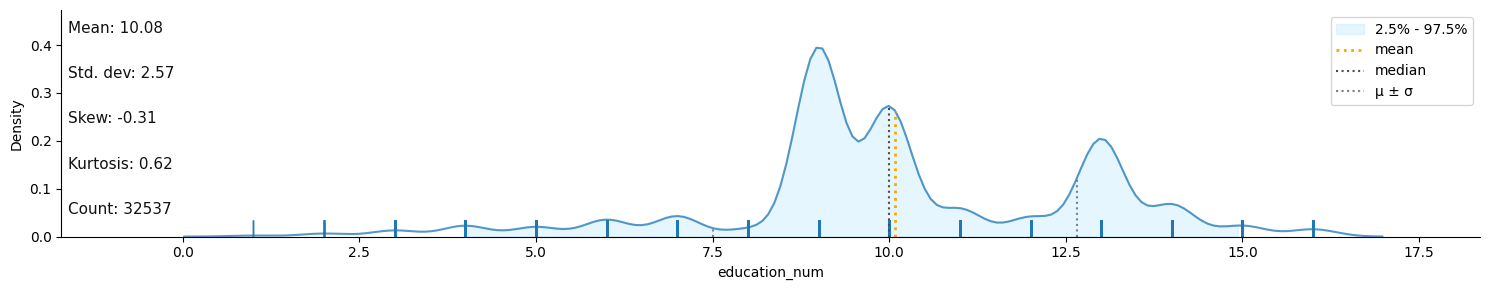

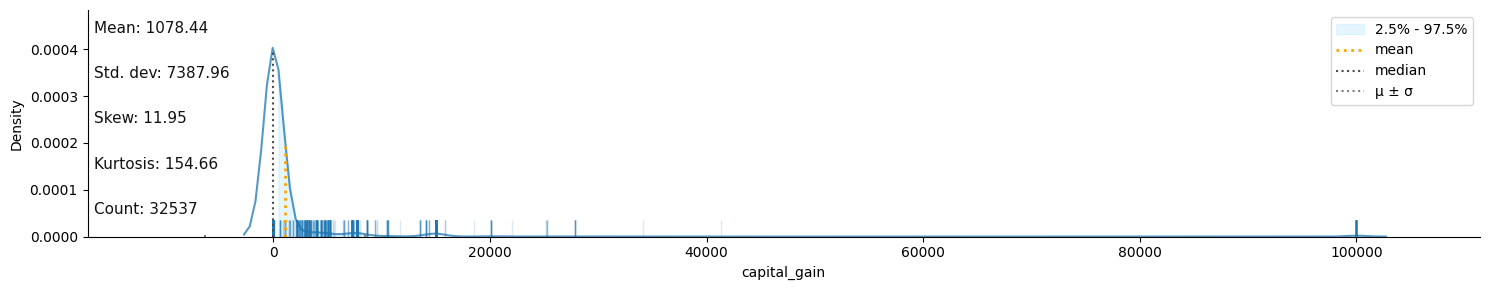

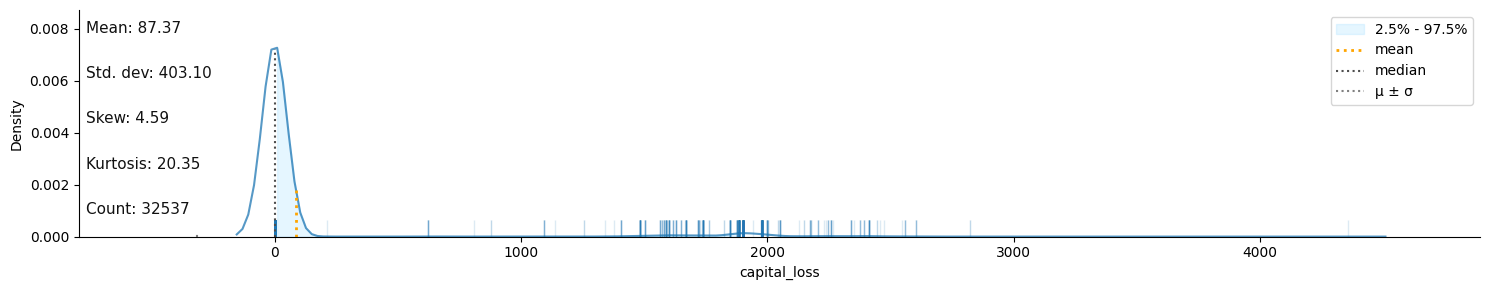

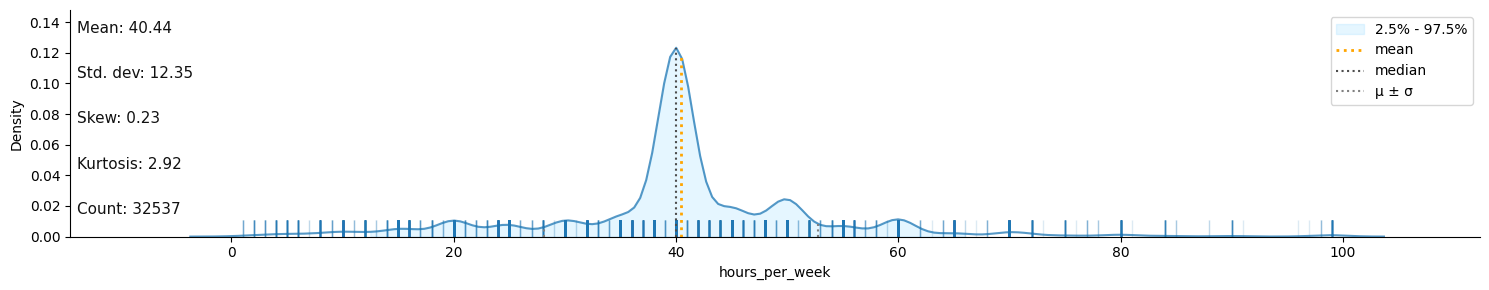

In [153]:
import klib
for i in adult.describe().columns:
    klib.dist_plot(adult[i])

GridSpec(6, 9)

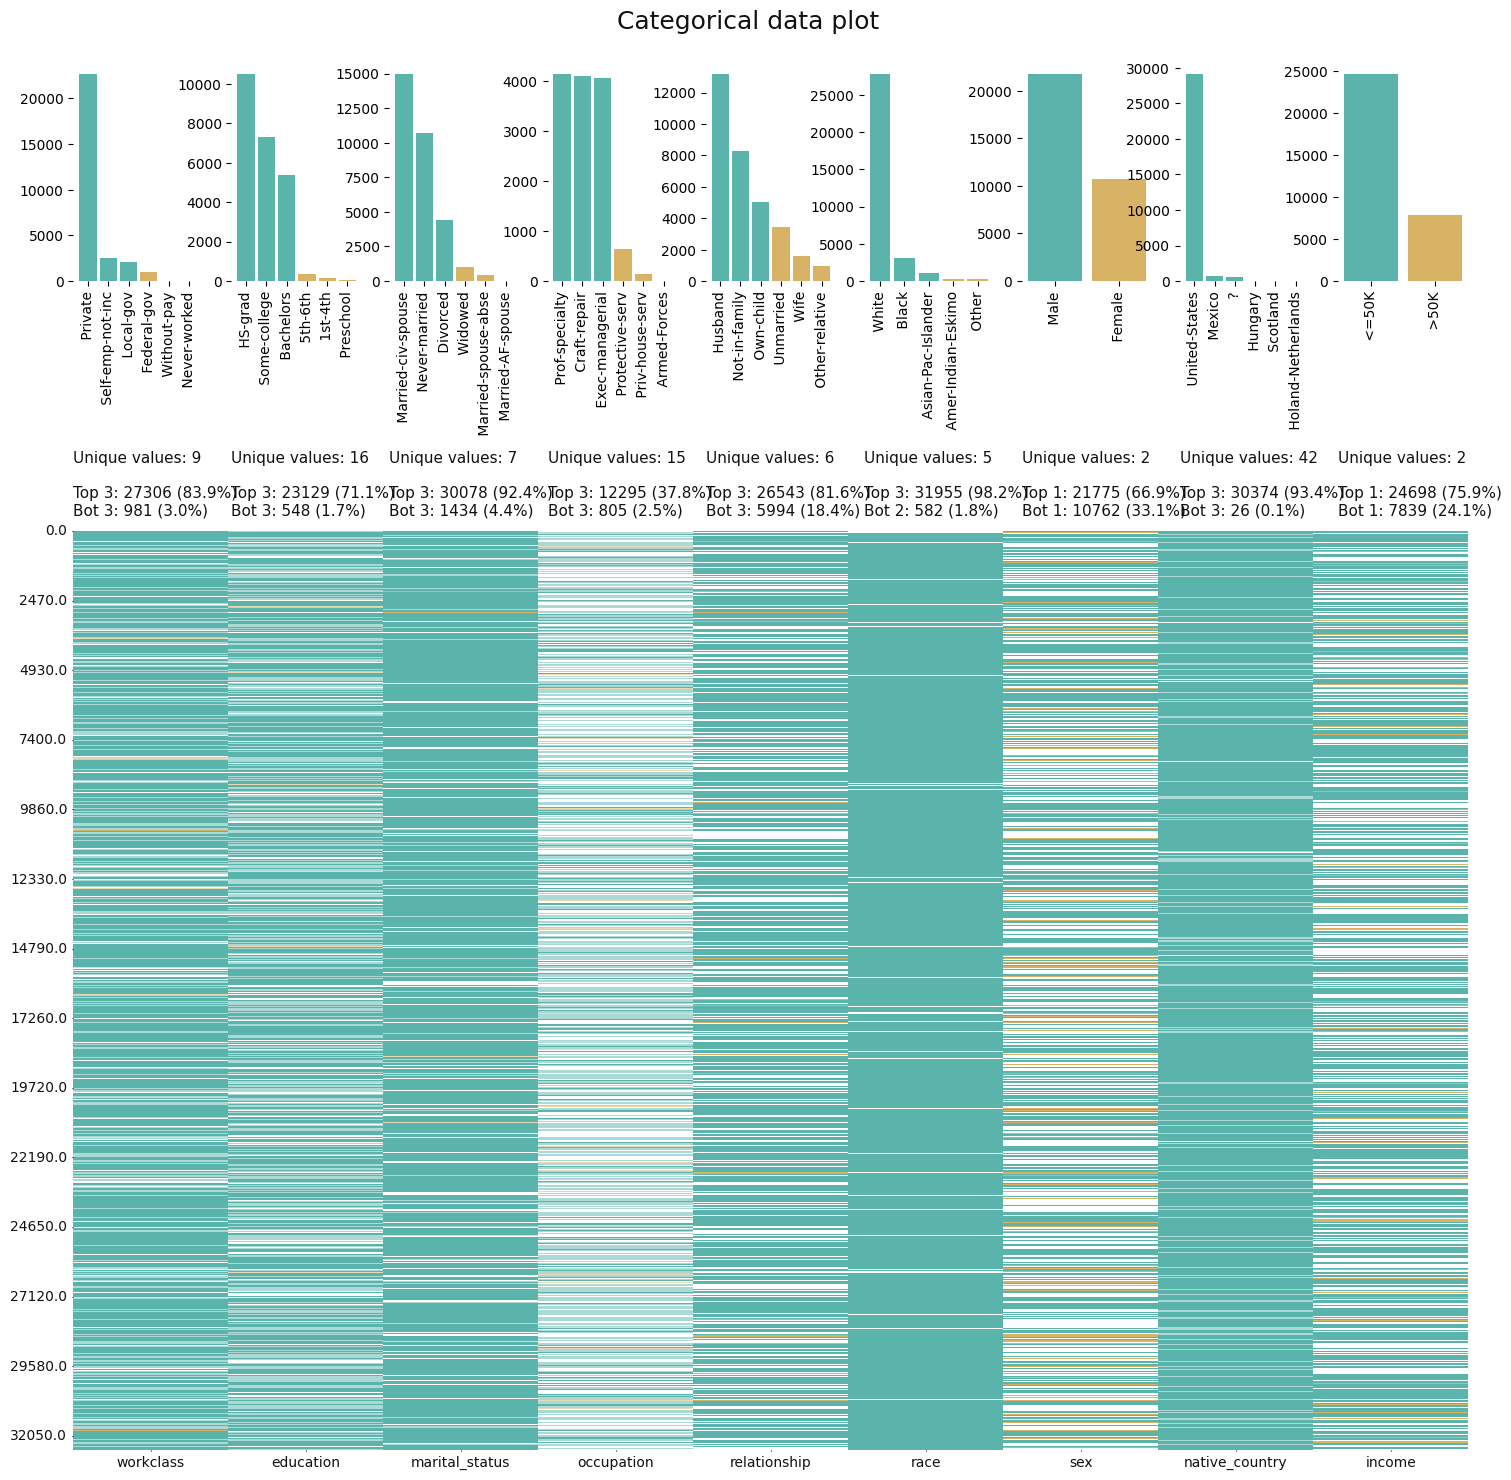

In [154]:
klib.cat_plot(adult)

In [155]:
#!pip install dataprep

DataPrep Report
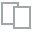
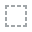
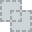
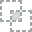
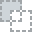
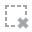
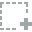
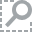
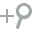
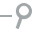
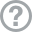
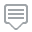
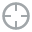
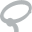
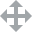
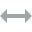
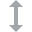
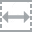
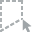
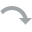
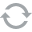
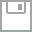
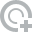
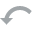
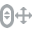
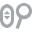
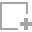
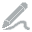
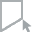
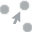
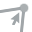
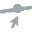

In [156]:
from dataprep.eda import create_report
create_report(adult)

In [157]:
adult['capital_diff'] = adult['capital_gain'] - adult['capital_loss']
adult['work_experience'] = adult['age'] - adult['education_num'] - 5
adult.head()

age          workclass  fnlwgt  ...  income  capital_diff work_experience
0   39          State-gov   77516  ...   <=50K          2174              21
1   50   Self-emp-not-inc   83311  ...   <=50K             0              32
2   38            Private  215646  ...   <=50K             0              24
3   53            Private  234721  ...   <=50K             0              41
4   28            Private  338409  ...   <=50K             0              10

[5 rows x 17 columns]

# Why These Features Might Be Beneficial
* **Capital Difference:**
This feature directly represents the financial impact of capital transactions, making it easier for the model to learn whether these transactions have a significant impact on income. It combines two features into one, reducing the complexity the model has to handle.

* **Work Experience:**
Work experience is a critical factor in determining income. More experienced workers are typically paid more, so this feature provides a direct estimate of experience, which might have a strong correlation with income. This feature also helps to contextualize the age and education_num features by showing how they interact to impact income.

In [158]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [159]:
sc = StandardScaler()
mm = MinMaxScaler()
le = LabelEncoder()

In [160]:
adult['age'] = sc.fit_transform(adult[['age']])
adult['hours_per_week'] = sc.fit_transform(adult[['hours_per_week']])

In [161]:
adult['fnlwgt'] = mm.fit_transform(adult[['fnlwgt']])
adult['capital_gain'] = mm.fit_transform(adult[['capital_gain']])
adult['capital_loss'] = mm.fit_transform(adult[['capital_loss']])
adult['education_num'] = mm.fit_transform(adult[['education_num']])
adult.head()

age          workclass    fnlwgt  ...  income  capital_diff work_experience
0  0.030390          State-gov  0.044302  ...   <=50K          2174              21
1  0.836973   Self-emp-not-inc  0.048238  ...   <=50K             0              32
2 -0.042936            Private  0.138113  ...   <=50K             0              24
3  1.056950            Private  0.151068  ...   <=50K             0              41
4 -0.776193            Private  0.221488  ...   <=50K             0              10

[5 rows x 17 columns]

*	**Standard Scaling:** Standard Scaling is generally used when the features are normally distributed or when the model assumes that the data is centered around zero with unit variance.

* **Min-Max Scaling:** Min-Max Scaling is suitable when you want to preserve the original relationships and distributions within a fixed range, which is important in algorithms like neural networks or when the data does not follow a normal distribution.

In [162]:
list1 = []
for i in adult.select_dtypes('object').columns:
    if adult[i].nunique() > 5:
        adult[i] = le.fit_transform(adult[[i]])
    else:
        list1.append(i)

adult.head()

age  workclass    fnlwgt  education  ...  native_country  income  capital_diff  work_experience
0  0.030390          7  0.044302          9  ...              39   <=50K          2174               21
1  0.836973          6  0.048238          9  ...              39   <=50K             0               32
2 -0.042936          4  0.138113         11  ...              39   <=50K             0               24
3  1.056950          4  0.151068          1  ...              39   <=50K             0               41
4 -0.776193          4  0.221488          9  ...               5   <=50K             0               10

[5 rows x 17 columns]

In [163]:
list1

['race', 'sex', 'income']

In [164]:
race = pd.get_dummies(adult['race'], drop_first=True)
race.head()

Asian-Pac-Islander   Black   Other   White
0                    0       0       0       1
1                    0       0       0       1
2                    0       0       0       1
3                    0       1       0       0
4                    0       1       0       0

In [165]:
sex = pd.get_dummies(adult['sex'], drop_first=True)
sex.head()

Male
0      1
1      1
2      1
3      1
4      0

In [166]:
income = pd.get_dummies(adult['income'], drop_first=True)
income.head()

>50K
0      0
1      0
2      0
3      0
4      0

In [167]:
adult = pd.concat([adult, race, sex, income], axis=1)
adult.head()

age  workclass    fnlwgt  education  education_num  ...   Black   Other   White  Male  >50K
0  0.030390          7  0.044302          9       0.800000  ...       0       0       1     1     0
1  0.836973          6  0.048238          9       0.800000  ...       0       0       1     1     0
2 -0.042936          4  0.138113         11       0.533333  ...       0       0       1     1     0
3  1.056950          4  0.151068          1       0.400000  ...       1       0       0     1     0
4 -0.776193          4  0.221488          9       0.800000  ...       1       0       0     0     0

[5 rows x 23 columns]

In [168]:
adult = adult.drop(['race', 'sex', 'income'], axis=1)
adult.head()

age  workclass    fnlwgt  education  education_num  ...   Black   Other   White   Male   >50K
0  0.030390          7  0.044302          9       0.800000  ...       0       0       1      1      0
1  0.836973          6  0.048238          9       0.800000  ...       0       0       1      1      0
2 -0.042936          4  0.138113         11       0.533333  ...       0       0       1      1      0
3  1.056950          4  0.151068          1       0.400000  ...       1       0       0      1      0
4 -0.776193          4  0.221488          9       0.800000  ...       1       0       0      0      0

[5 rows x 20 columns]

**Pros of One-Hot Encoding:**

* Easily interpretable results
* Efficient for sparse data
* Handles non-numeric categorical variables neatly

**Cons of One-Hot Encoding:**

* High dimensionality and memory consumption
* May lead to the curse of dimensionality
* Computationally expensive

**Pros of Label Encoding:**

* Easily handle large datasets
* Less memory consumption
* Quick computation

**Cons of Label Encoding:**

* May lead to confusion if similar categories are close together
* Can be sensitive to the order of categories
* Not suitable for unordered categorical data

In [169]:
adult['capital_gain'] = np.log(adult['capital_gain'])
adult.head()

age  workclass    fnlwgt  education  education_num  ...   Black   Other   White   Male   >50K
0  0.030390          7  0.044302          9       0.800000  ...       0       0       1      1      0
1  0.836973          6  0.048238          9       0.800000  ...       0       0       1      1      0
2 -0.042936          4  0.138113         11       0.533333  ...       0       0       1      1      0
3  1.056950          4  0.151068          1       0.400000  ...       1       0       0      1      0
4 -0.776193          4  0.221488          9       0.800000  ...       1       0       0      0      0

[5 rows x 20 columns]

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='capital_gain', ylabel='Density'>

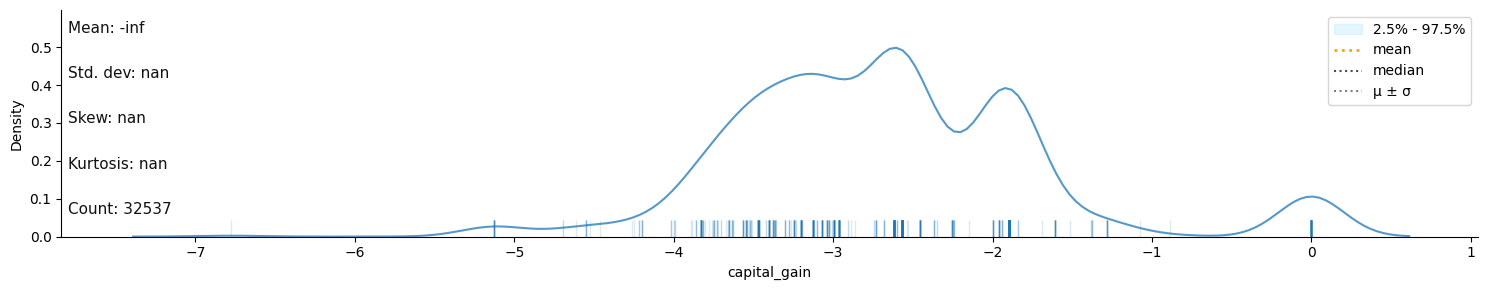

In [170]:
klib.dist_plot(adult['capital_gain'])

In [171]:
adult['capital_gain'] = adult['capital_gain'].replace(-np.inf, np.nan)
min_value = adult['capital_gain'].min()
adult['capital_gain'] = adult['capital_gain'].fillna(min_value)
adult.head()

age  workclass    fnlwgt  education  education_num  ...   Black   Other   White   Male   >50K
0  0.030390          7  0.044302          9       0.800000  ...       0       0       1      1      0
1  0.836973          6  0.048238          9       0.800000  ...       0       0       1      1      0
2 -0.042936          4  0.138113         11       0.533333  ...       0       0       1      1      0
3  1.056950          4  0.151068          1       0.400000  ...       1       0       0      1      0
4 -0.776193          4  0.221488          9       0.800000  ...       1       0       0      0      0

[5 rows x 20 columns]

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='capital_gain', ylabel='Density'>

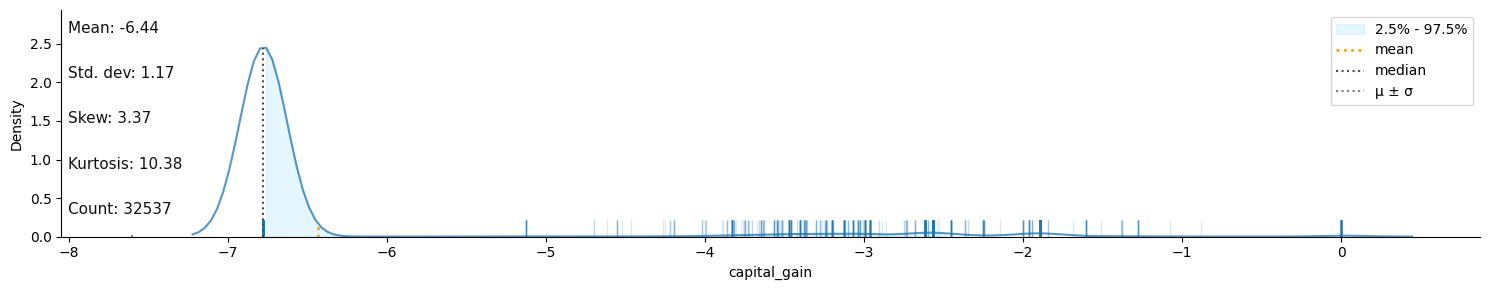

In [174]:
klib.dist_plot(adult['capital_gain'])

# **Why Log Transformation for "Capital Gain"?**

* The "capital_gain" feature, being highly skewed, likely has many small values and a few very large values. Applying a log transformation can help reduce this skew, making the distribution more normal-like (Gaussian), which many models prefer.

In [175]:
from sklearn.ensemble import IsolationForest

In [176]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(adult)
yhat

array([ 1,  1,  1, ...,  1,  1, -1])

In [177]:
mask = yhat != -1
adult = adult[mask]
adult.head()

age  workclass    fnlwgt  education  education_num  ...   Black   Other   White   Male   >50K
0  0.030390          7  0.044302          9       0.800000  ...       0       0       1      1      0
1  0.836973          6  0.048238          9       0.800000  ...       0       0       1      1      0
2 -0.042936          4  0.138113         11       0.533333  ...       0       0       1      1      0
3  1.056950          4  0.151068          1       0.400000  ...       1       0       0      1      0
5 -0.116262          4  0.184932         12       0.866667  ...       0       0       1      0      0

[5 rows x 20 columns]

* Outliers can distort model performance, leading to overfitting, increased variance, and poor generalization.

* Removing outliers can result in a more robust and accurate model, as it allows the model to focus on the general pattern of the data without being misled by extreme values.

In [178]:
#!pip install ppscore

In [179]:
import ppscore as pps
pp_score = pps.matrix(adult)
pp_score

x              y  ppscore  ... baseline_score  model_score                    model
0      age            age      1.0  ...       0.000000     1.000000                     None
1      age      workclass      0.0  ...       0.651800     0.764853  DecisionTreeRegressor()
2      age         fnlwgt      0.0  ...       0.051582     0.052407  DecisionTreeRegressor()
3      age      education      0.0  ...       2.626800     2.688865  DecisionTreeRegressor()
4      age  education_num      0.0  ...       0.117680     0.119399  DecisionTreeRegressor()
..     ...            ...      ...  ...            ...          ...                      ...
395   >50K          Black      0.0  ...       0.067400     0.124161  DecisionTreeRegressor()
396   >50K          Other      0.0  ...       0.004400     0.008752  DecisionTreeRegressor()
397   >50K          White      0.0  ...       0.093800     0.167208  DecisionTreeRegressor()
398   >50K           Male      0.0  ...       0.306000     0.403355  DecisionTreeRegressor()
399   >50K           >50K      1.0  ...       0.000000     1.000000                     None

[400 rows x 9 columns]

In [180]:
pp_corr = pd.pivot_table(pp_score, index='x', columns='y', values='ppscore')
pp_corr

y                     >50K   Asian-Pac-Islander     Black  ...  relationship  work_experience  workclass
x                                                          ...                                          
 >50K                  1.0                  0.0  0.000000  ...      0.000000         0.014503   0.000000
 Asian-Pac-Islander    0.0                  1.0  0.000000  ...      0.000000         0.000000   0.000000
 Black                 0.0                  0.0  1.000000  ...      0.000000         0.000000   0.000000
 Male                  0.0                  0.0  0.000000  ...      0.116089         0.000000   0.000000
 Other                 0.0                  0.0  0.000000  ...      0.000000         0.000000   0.000000
 White                 0.0                  0.0  0.435354  ...      0.000000         0.000000   0.000000
age                    0.0                  0.0  0.000000  ...      0.034419         0.833588   0.000000
capital_diff           0.0                  0.0  0.000000  ...      0.000000         0.000000   0.000000
capital_gain           0.0                  0.0  0.000000  ...      0.000000         0.000000   0.000000
capital_loss           0.0                  0.0  0.000000  ...      0.000000         0.000000   0.000000
education              0.0                  0.0  0.000000  ...      0.000000         0.021283   0.000000
education_num          0.0                  0.0  0.000000  ...      0.000000         0.021283   0.000000
fnlwgt                 0.0                  0.0  0.000000  ...      0.000000         0.000000   0.000000
hours_per_week         0.0                  0.0  0.000000  ...      0.000000         0.000768   0.000000
marital_status         0.0                  0.0  0.000000  ...      0.180170         0.188431   0.000000
native_country         0.0                  0.0  0.000000  ...      0.000000         0.000000   0.000000
occupation             0.0                  0.0  0.000000  ...      0.000000         0.009183   0.111584
relationship           0.0                  0.0  0.000000  ...      1.000000         0.131672   0.000000
work_experience        0.0                  0.0  0.000000  ...      0.020398         1.000000   0.000000
workclass              0.0                  0.0  0.000000  ...      0.000000         0.007458   1.000000

[20 rows x 20 columns]

<Axes: xlabel='y', ylabel='x'>

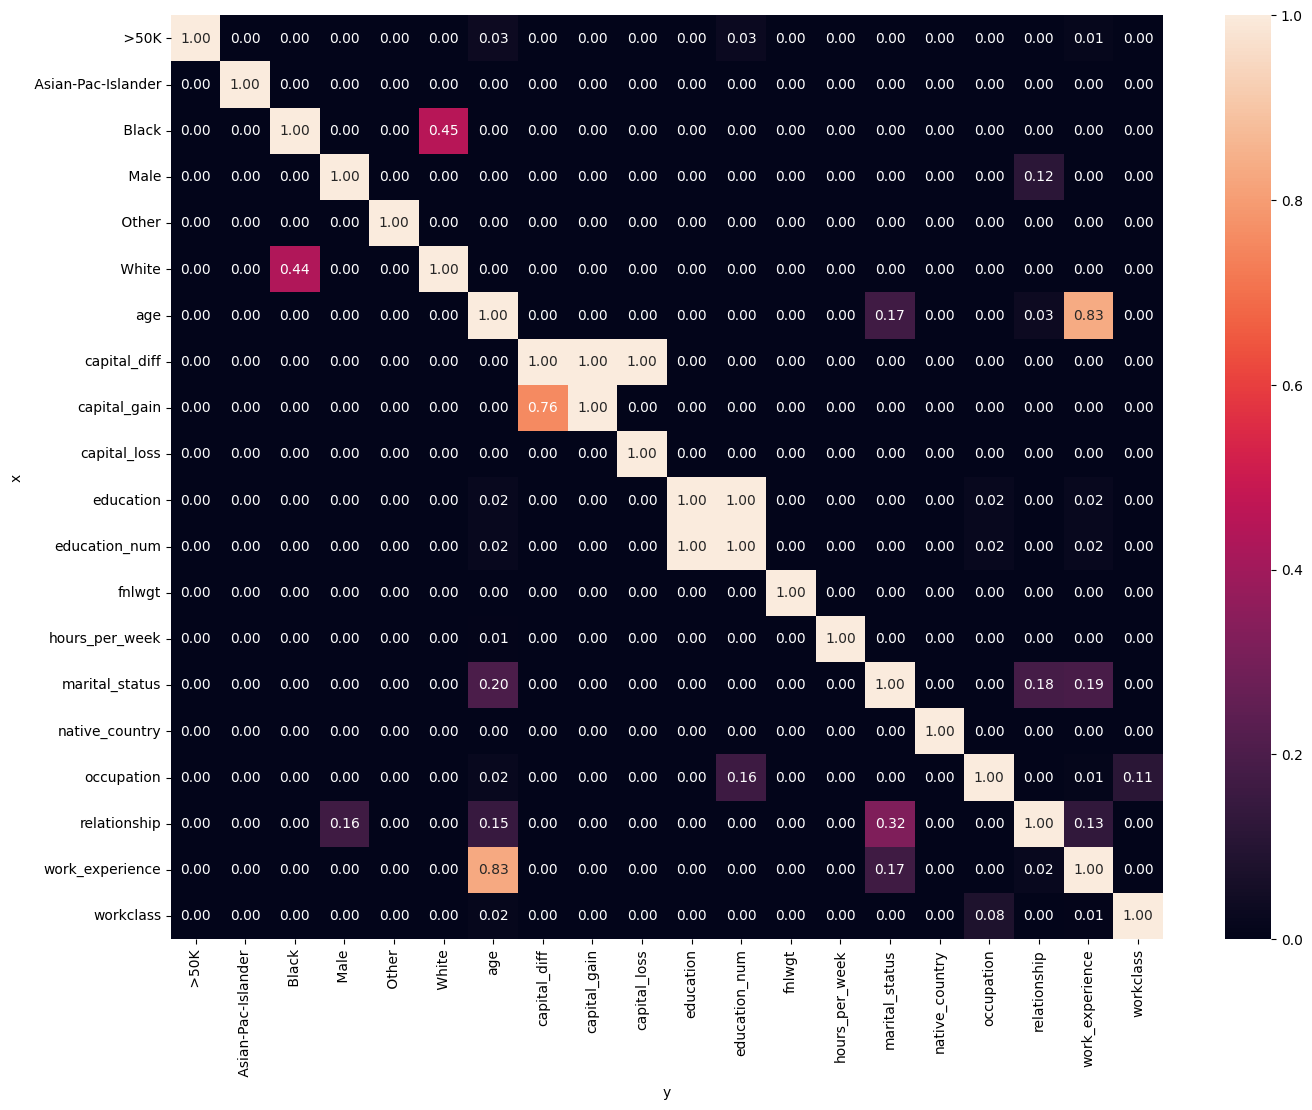

In [181]:
plt.figure(figsize=(16,12))
sns.heatmap(pp_corr,annot=True,fmt=".2f")

In [182]:
corr = adult.corr()
corr

age  workclass    fnlwgt  ...     White      Male      >50K
age                  1.000000   0.047532 -0.080651  ...  0.070766  0.117207  0.245514
workclass            0.047532   1.000000 -0.018235  ...  0.026334  0.083652  0.039371
fnlwgt              -0.080651  -0.018235  1.000000  ... -0.039172  0.029454 -0.016636
education            0.012927  -0.001358 -0.027317  ... -0.043147 -0.049858  0.062425
education_num        0.066836   0.025502 -0.045378  ...  0.039378 -0.002269  0.316609
marital_status      -0.319413  -0.054143  0.032797  ... -0.099096 -0.122836 -0.194673
occupation          -0.002060   0.213882  0.000862  ... -0.003106  0.073464  0.068890
relationship        -0.301066  -0.089813  0.006244  ... -0.109826 -0.569935 -0.282398
capital_gain         0.091014   0.022979 -0.020434  ...  0.067560  0.089196  0.244497
capital_loss         0.039220   0.010218 -0.015036  ...  0.059121  0.072260  0.135692
hours_per_week       0.112234   0.117909 -0.023214  ...  0.046604  0.226217  0.223973
native_country       0.013044  -0.007770 -0.062925  ... -0.007365 -0.020613  0.029508
capital_diff         0.084366   0.023836 -0.017103  ...  0.048829  0.076695  0.250720
work_experience      0.982924   0.042603 -0.071899  ...  0.063168  0.117069  0.185956
 Asian-Pac-Islander -0.023359   0.008921 -0.031943  ... -0.346229  0.025687 -0.022530
 Black              -0.059516  -0.027103  0.083702  ... -0.844253 -0.088644 -0.112961
 Other              -0.028658   0.002181  0.001876  ... -0.178461 -0.003731 -0.028881
 White               0.070766   0.026334 -0.039172  ...  1.000000  0.071524  0.124706
 Male                0.117207   0.083652  0.029454  ...  0.071524  1.000000  0.229674
 >50K                0.245514   0.039371 -0.016636  ...  0.124706  0.229674  1.000000

[20 rows x 20 columns]

<Axes: >

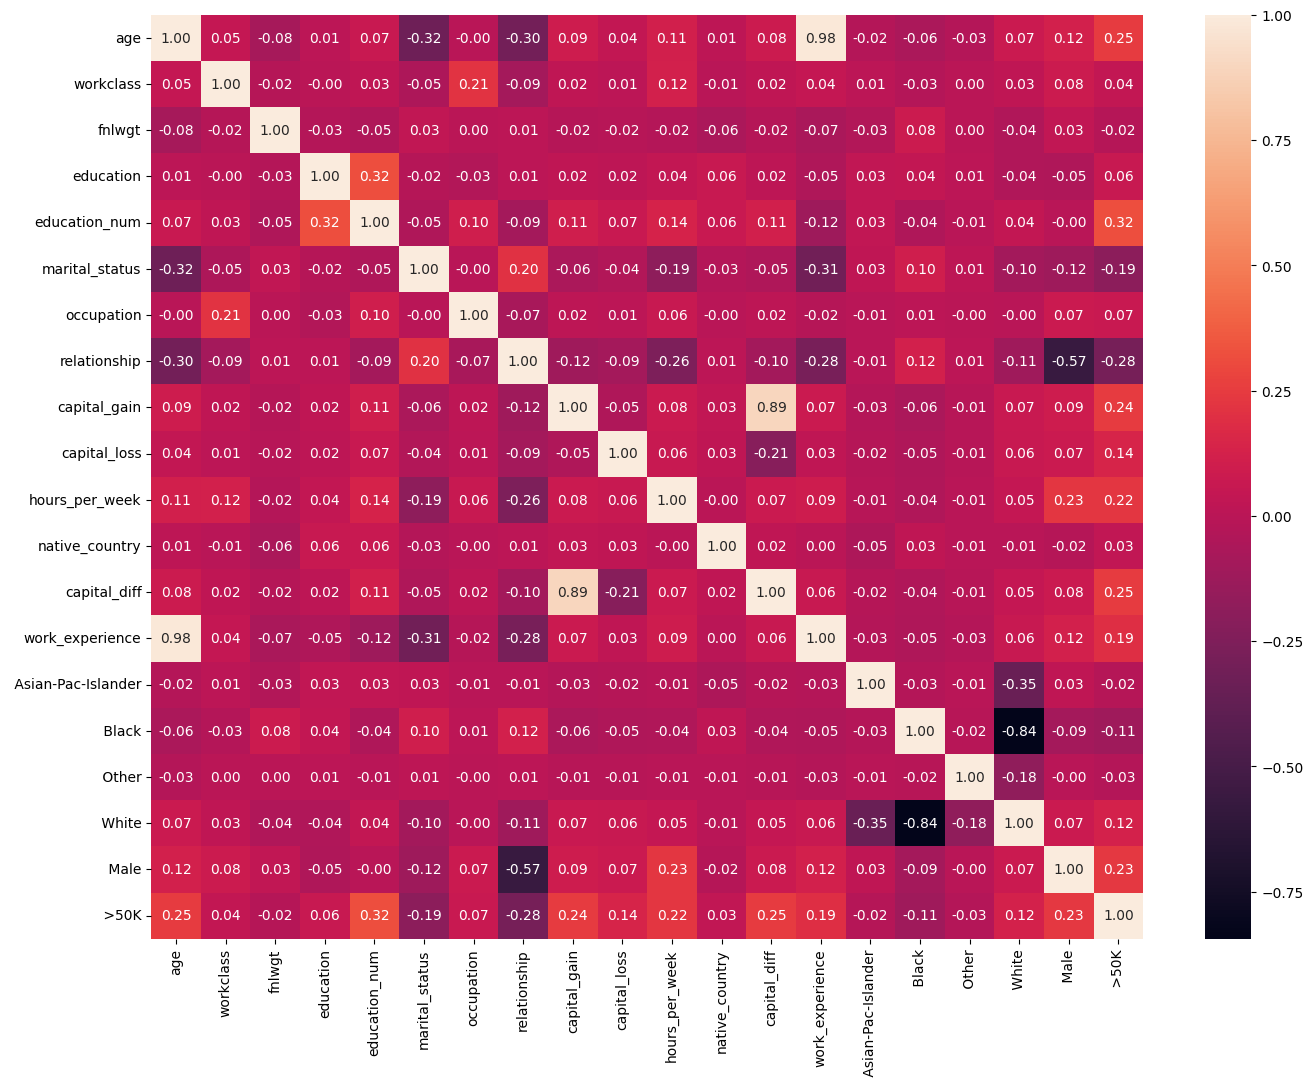

In [183]:
plt.figure(figsize=(16,12))
sns.heatmap(corr,annot=True,fmt=".2f")

### **Comparison and Discussion**

- **Predictive Power vs. Correlation**:
  - Both matrices indicate that features like `education_num` and `age` are influential in predicting higher income (`>50K`). However, the PPS matrix provides insights into the predictive power of these features more directly.
  - Features like `workclass` and `native_country` have low predictive power in the PPS matrix, and this is consistent with their low or negligible correlations in the correlation matrix.

- **Features with High Correlation but Low Predictive Power**:
  - `age` and `work_experience` have a high correlation (0.983121), but `work_experience` has only a moderate predictive power score (0.173629). This suggests that while `age` and `work_experience` are related, the latter's contribution to predicting income above $50K is less significant.

- **Feature Relationships**:
  - The correlation matrix shows how features like `education_num` and `education` are perfectly correlated, which makes sense as higher education generally translates to higher education numbers.
  - Negative correlations such as `marital_status` and `relationship` with `>50K` in the correlation matrix indicate that the impact of these features on income might be complex and dependent on other interacting features.